In [1]:
import pandas as pd
import pysubgroup as ps

In [2]:
from pathlib import Path
import numpy as np
folder= Path.home()/Path('Downloads')
def show_info(df):
    print(df.columns)
    print(len(df))

In [3]:
df_melb = pd.read_csv(folder/'melb_data.csv')
df_melb = df_melb[df_melb['BuildingArea'] < 1500]
df_melb=df_melb.drop(['Address', "Lattitude", "Longtitude"],axis=1)
#df_housing['price']/=np.max(df_housing['price'])

In [4]:
print(df_melb.columns)
print(len(df_melb))

Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
7125


In [5]:
df_bej_in = pd.read_csv(folder/'bejing.csv',engine="python")

In [6]:
df_bej=df_bej_in.drop(['url','id','Cid','tradeTime','floor'],axis=1)
df_bej['Price']=df_bej['price']*df_bej['square']
df_bej=df_bej.drop(['totalPrice','price'],axis=1)
df_bej=df_bej[~pd.isnull(df_bej.district)]
df_bej.district=df_bej.district.astype('int')
#df_melb = df_melb[df_melb['BuildingArea'] < 1500]

In [7]:
#df_bej['totalPrice']*10000-df_bej['Price']

In [8]:
show_info(df_bej_in)

Index(['url', 'id', 'Lng', 'Lat', 'Cid', 'tradeTime', 'DOM', 'followers',
       'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'floor', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage'],
      dtype='object')
318851


In [9]:
#df_nyc = pd.read_csv(folder/'nyc_data.csv')
#df_nyc=df_nyc[df_nyc['SALE PRICE'].str.isnumeric()]
#df_nyc['SALE PRICE']=pd.to_numeric(df_nyc['SALE PRICE'])
#df_nyc=df_nyc[df_nyc['SALE PRICE']<0.5*10**7]
#df_nyc=df_nyc[df_nyc['TOTAL UNITS']<1500]
#show_info(df_nyc)

In [10]:
#ax=df_melb.plot.scatter('BuildingArea', 'Price')
#df_nyc.plot.scatter('TOTAL UNITS', 'SALE PRICE', ax =ax, color='r')

In [11]:
show_info(df_bej)
def room2Numeric(df, column):
    #print(df[column].dtype)
    if df[column].dtype != 'object':
        return df
    df = df[df[column].str.isnumeric()]
    df[column] = pd.to_numeric(df[column])
    return df
df_bej=room2Numeric(df_bej, 'livingRoom')
df_bej=room2Numeric(df_bej, 'drawingRoom')
df_bej=room2Numeric(df_bej, 'bathRoom')
df_bej=room2Numeric(df_bej, 'constructionTime')

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage', 'Price'],
      dtype='object')
318851


<ipython-input-11-db2060c12c7b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column] = pd.to_numeric(df[column])


In [12]:
df_bej.DOM

0         1464.0
1          903.0
2         1271.0
3          965.0
4          927.0
           ...  
318845       1.0
318846       1.0
318847       NaN
318848       1.0
318849       NaN
Name: DOM, Length: 299536, dtype: float64

In [13]:
show_plots=False

In [14]:

#ax=df_nyc["SALE PRICE"].plot.hist(bins=100)
df_melb=df_melb[df_melb["Price"]<5000000]
if show_plots:
    df_melb["Price"].plot.hist(bins=100,color='r')

In [15]:
df_melb=df_melb[df_melb["BuildingArea"]<200]
df_melb=df_melb[df_melb["BuildingArea"]>20]

In [16]:
print(df_bej.Price.max())

181301594.0


In [17]:
df_bej=df_bej[df_bej["Price"]>5000]
df_bej=df_bej[df_bej["square"]<200]
if show_plots:
    df_bej["price"].plot.hist(bins=100,color='b')

In [18]:
df_bej['Price']=df_bej["Price"]/np.std(df_bej["Price"])
df_melb['Price']=df_melb["Price"]/np.std(df_melb["Price"])

In [19]:
#df_bej['square']=df_bej["square"]/np.std(df_bej["square"])
#df_melb['BuildingArea']=df_melb["BuildingArea"]/np.std(df_melb["BuildingArea"])

In [20]:
df_bej=df_bej[df_bej["Price"]<4]
#df_melb=df_melb[df_melb["Price"]<5]

In [21]:
len(df_bej)

285695

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(15,10)})



In [23]:
max_square=max(df_melb['BuildingArea'].max(),df_bej['square'].max())
print(max_square)

199.99


In [24]:
if False:
    
    x=np.linspace(0,max_square)
    ax=plt.scatter(df_bej['square'],df_bej["Price"],color='b',alpha=0.1)
    #ax=plt.scatter(df_melb['BuildingArea'],df_melb["Price"],color='m',alpha=0.5)

    plt.plot(x,np.polyval(np.polyfit(df_bej['square'],df_bej['Price'],1),x),'b--')
    #plt.plot(x,np.polyval(np.polyfit(df_melb['BuildingArea'],df_melb['Price'],1),x),'m--')

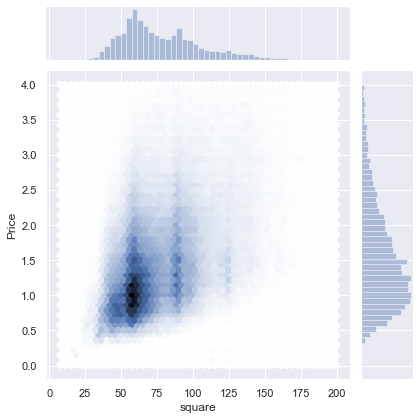

In [25]:
sns.jointplot("square", "Price", data=df_bej, kind="hex")
plt.savefig('E:/Masterarbeit/Bejing.png',dpi=300)

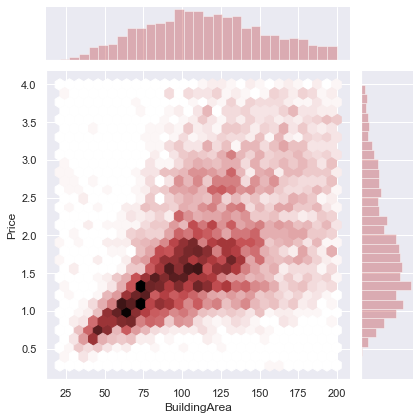

In [26]:
sns.jointplot("BuildingArea", "Price", data=df_melb[df_melb['Price']<4], kind="hex", color ='r')
plt.savefig('E:/Masterarbeit/Melbourne.png',dpi=300)

In [27]:
df_bej.columns

Index(['Lng', 'Lat', 'DOM', 'followers', 'square', 'livingRoom', 'drawingRoom',
       'kitchen', 'bathRoom', 'buildingType', 'constructionTime',
       'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator',
       'fiveYearsProperty', 'subway', 'district', 'communityAverage', 'Price'],
      dtype='object')

In [28]:
if show_plots:
    column='renovationCondition'
    for d in np.unique(df_bej[column]):
        if not pd.isnull(d):
            print(d)
            g = sns.jointplot("square", "Price", data=df_bej[df_bej[column]==d], kind="reg")

In [29]:
if show_plots:
    for d in np.unique(df_bej.district):
        print(d)
        g = sns.jointplot("square", "Price", data=df_bej[df_bej.district==d], kind="reg")


In [30]:
#import string
#

In [31]:
df_bej.district

0         7
1         7
3         6
4         1
5         7
         ..
318845    3
318846    3
318847    3
318848    3
318849    3
Name: district, Length: 285695, dtype: int32

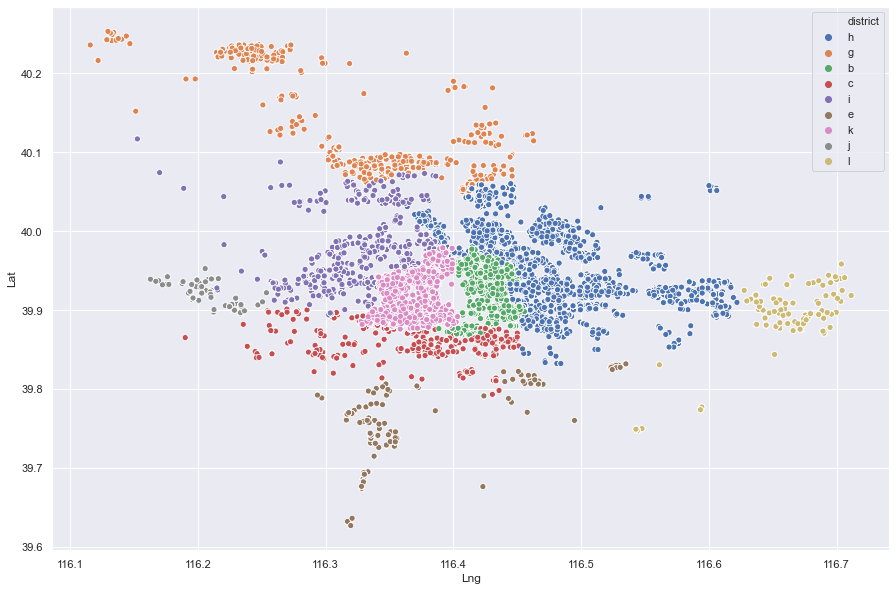

In [32]:
import string
def plot_map(df_in):
    
    d={key:val for key, val in enumerate(string.ascii_lowercase)}
    df=df_in[['Lng','Lat','district']].copy()
    df.apply
    df['district']=df.district.apply(d.get)
    df=df[~df.district.isin(['d','f','m','n'])]
    df.district.value_counts().sort_index()

    sns.scatterplot(x='Lng',y='Lat',hue='district',data=df)
plot_map(df_bej)

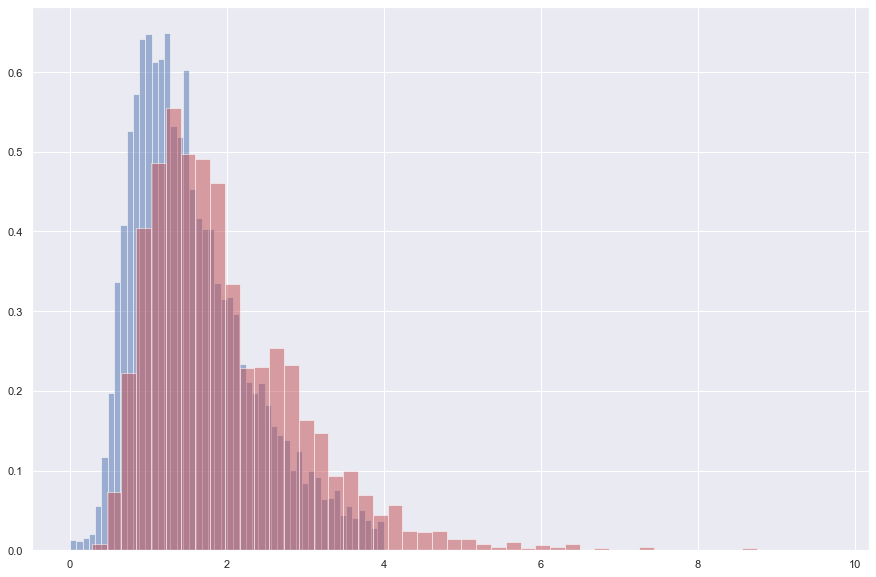

In [33]:
if True:
    plt.hist(df_bej["Price"],bins=50,color='b',density=True,alpha=0.5)
    plt.hist(df_melb["Price"],bins=50,color='r',density=True,alpha=0.5)

In [34]:
df_bej['elevator']=df_bej['elevator'].astype('bool')
df_bej['subway']=df_bej['subway'].astype('bool')
df_bej['fiveYearsProperty']=df_bej['fiveYearsProperty'].astype('bool')
df_bej=df_bej.drop(['Lng','Lat'],axis=1)

In [35]:
show_info(df_bej)
show_info(df_melb)

Index(['DOM', 'followers', 'square', 'livingRoom', 'drawingRoom', 'kitchen',
       'bathRoom', 'buildingType', 'constructionTime', 'renovationCondition',
       'buildingStructure', 'ladderRatio', 'elevator', 'fiveYearsProperty',
       'subway', 'district', 'communityAverage', 'Price'],
      dtype='object')
285695
Index(['Suburb', 'Rooms', 'Type', 'Price', 'Method', 'SellerG', 'Date',
       'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'YearBuilt', 'CouncilArea', 'Regionname',
       'Propertycount'],
      dtype='object')
5812


In [36]:
def create_bej_selectors(df,ignore=['Price','square']):
    ignore+=['communityAverage']
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    return sels

def create_melb_selectors(df,ignore=['BuildingArea','Price']):
    ignore+=['Date','SellerG','Suburb']
    sels=ps.create_nominal_selectors(df,ignore=ignore)+ps.create_numeric_selectors(df,ignore=ignore)
    return sels

def run_single_task(df_bej, df_melb, Qf_L, Qf_R, sim_fun, total_fun, parameters):
    sels_L=create_bej_selectors(df_bej)
    sels_R=create_melb_selectors(df_melb)

    task_L = ps.SubgroupDiscoveryTask(df_bej, None, sels_L, Qf_L, result_set_size = parameters.result_size, depth=2)
    task_L.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#parameters.result_size)
    task_R = ps.SubgroupDiscoveryTask(df_melb, None, sels_R, Qf_R, result_set_size = parameters.result_size, depth=parameters.depth)
    task_R.algorithm = ps.SimpleSearch(show_progress=True) #ps.DFS(ps.BitSetRepresentation)#(parameters.result_size)
    similarity_function = sim_fun
    run=beam_search_through_candidates(task_L, task_R, parameters.total_result_size, None, similarity_function, total_fun, show_progress=True)

    tpl_L=next(run)
    tpl_R=next(run)
    result=next(run)
    return result

In [43]:
from RDMM.evaluation_framework import *
result=[]
alpha=0.5
beta=0.5
gamma=0.5
def get_beta(tpl):
    return tpl.beta.flatten()


ex_qf1 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('square','Price')), gamma)
ex_qf2 = SizeWrapper(EMM_LikelihoodGain(PolyRegression_ModelClass('BuildingArea','Price')), gamma)

#sim_qf = Sim_Direct_Distance(PolyRegression_ModelClass('square','Price'), PolyRegression_ModelClass('BuildingArea','Price'), ParameterDistance(get_beta))
sim_qf = DoubleCooksSimilarity(PolyRegression_ModelClass('square','Price'), PolyRegression_ModelClass('BuildingArea','Price'))
#sim_qf = LikelihoodSimilarity(PolyRegression_ModelClass('square','price'), PolyRegression_ModelClass('BuildingArea','Price'))
parameters=mine_pair_parameters(500,100,2,'mine_pair',[])

result=list(sorted(run_single_task(df_bej, df_melb, ex_qf1, ex_qf2, sim_qf, functools.partial(final_qf,alpha,beta), parameters),reverse=True))

  0%|▊                                                                                                                                                                                                                                                   | 7/2080 [00:00<00:33, 62.11it/s]e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
 16%|██████████████████████████████████████▉                                                                                                                                                                                                         | 740/4560 [00:00<00:01, 3695.50it/s]e:\sgd\rdmm-project\RDMM\QualityFunctions.py:181: RankWarning: Polyfit ma

DOM: [14.0:47.0[ AND kitchen==1 <=> Rooms: [2:3[ AND YearBuilt<1930.0


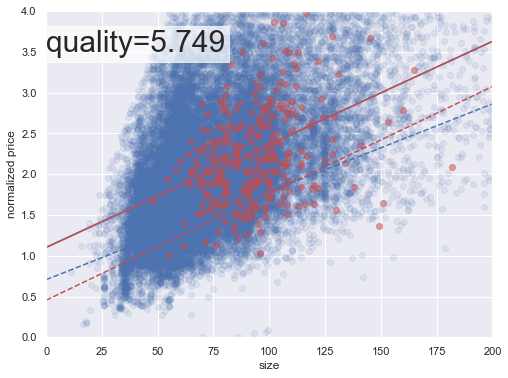

drawingRoom==1 AND followers: [0:3[ <=> Regionname=='Western Metropolitan'


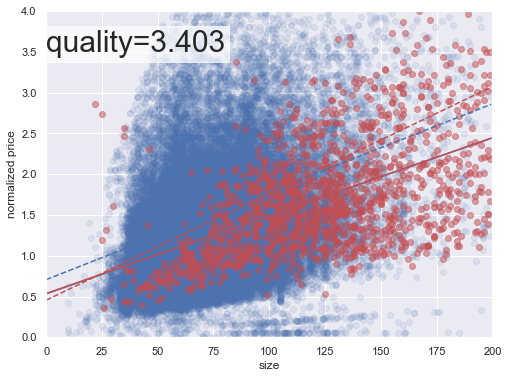

constructionTime: [1991:1998[ AND subway==False <=> Car: [1.0:2.0[ AND Type=='t'


e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


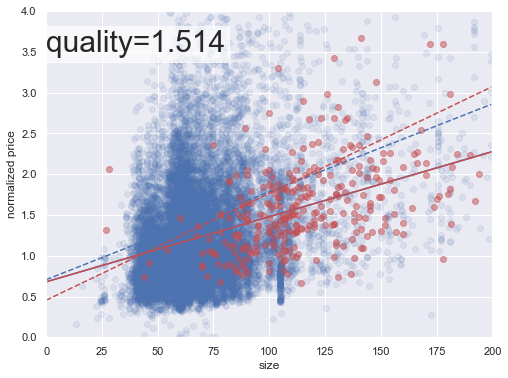

bathRoom: [1:2[ AND elevator==False <=> Bathroom: [2.0:3.0[ AND Distance>=13.70


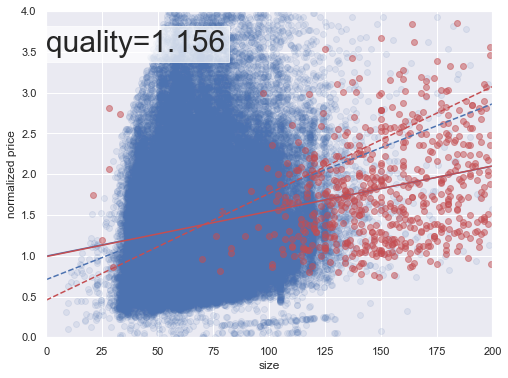

constructionTime: [1998:2003[ AND renovationCondition==1 <=> Rooms: [3:4[ AND YearBuilt>=2000.0


e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


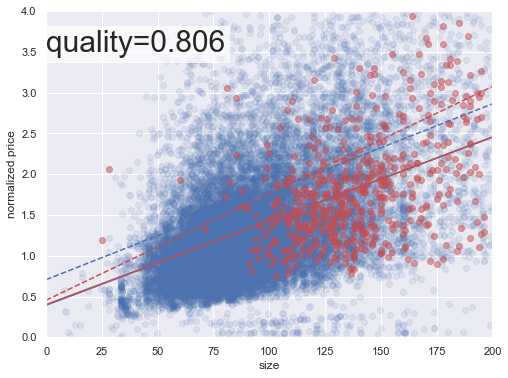

fiveYearsProperty==False AND followers: [0:3[ <=> YearBuilt>=2000.0


e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


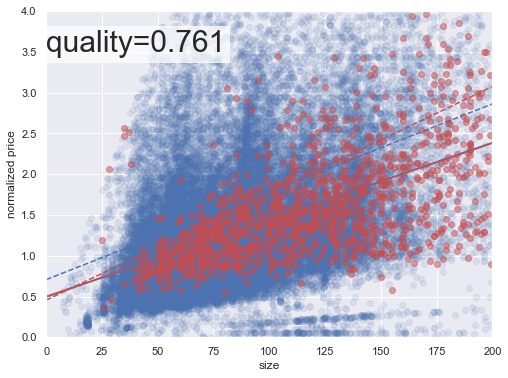

buildingType==4.0 AND subway==False <=> Method=='S' AND Regionname=='Western Metropolitan'


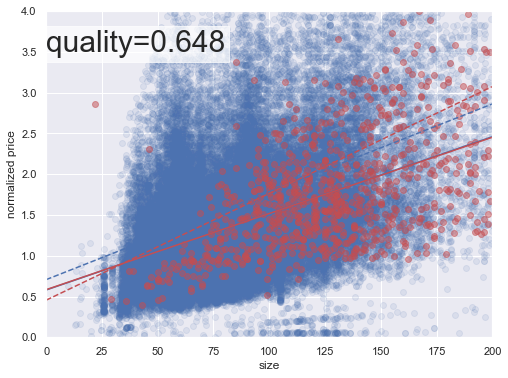

bathRoom: [1:2[ AND followers: [0:3[ <=> YearBuilt: [1970.0:2000.0[


e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


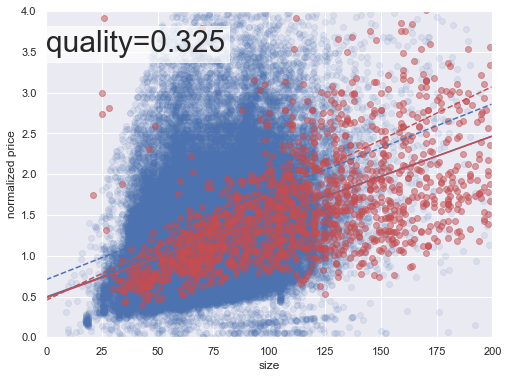

buildingType==4.0 AND elevator==False <=> Bathroom: [2.0:3.0[ AND Distance>=13.70


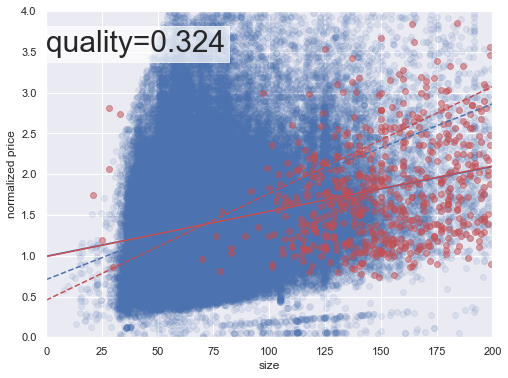

constructionTime: [1991:1998[ AND followers: [0:3[ <=> Distance: [10.70:13.70[ AND YearBuilt: [1970.0:2000.0[


e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in greater_equal
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)
e:\sgd\pysubgroup-project\pysubgroup\subgroup.py:211: RuntimeWarning: invalid value encountered in less
  return np.logical_and(val >= self.lower_bound, val < self.upper_bound)


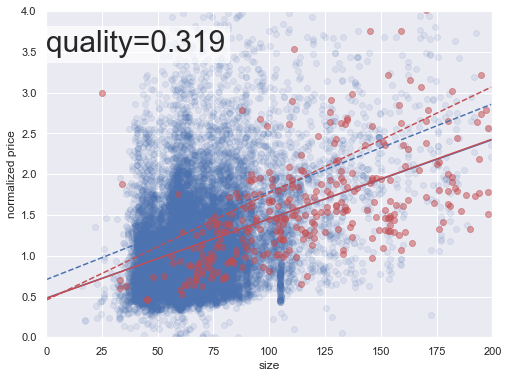

In [44]:
sns.set(rc={'figure.figsize':(8,6)})
def plot_result(qual, tpl,df1,df2):

    overall1=np.polyfit(df1['square'],df1['Price'],1)
    overall2=np.polyfit(df2['BuildingArea'],df2['Price'],1)

    sgd1,sgd2,stats_1,stats_2,_,_,_=tpl
    df1_cov=df1[sgd1.covers(df1)]
    df2_cov=df2[sgd2.covers(df2)]
    max_square=max(df2_cov['BuildingArea'].max(),df1_cov['square'].max())
    x=np.linspace(0,max_square)

    
    plt.scatter(df1_cov['square'],df1_cov['Price'],alpha=1/10,color='b')
    beta1=np.polyfit(df1_cov['square'],df1_cov['Price'],1)
    plt.plot(x,np.polyval(beta1,x),color='b')

    plt.scatter(df2_cov['BuildingArea'],df2_cov['Price'],color='r',alpha=0.5)
    beta2=np.polyfit(df2_cov['BuildingArea'],df2_cov['Price'],1)

    plt.plot(x,np.polyval(overall1,x),'b--')
    plt.plot(x,np.polyval(overall2,x),'r--')

    plt.plot(x,np.polyval(beta2,x),color='r')
    #plt.title(str(sgd1)+' <=> '+str(sgd2))
    plt.ylim(0,4)
    plt.xlim(0,200)
    plt.xlabel("size")
    plt.ylabel("normalized price")
    
    t = plt.text(0,3.5,f'quality={qual:.{3}f}', fontsize=30)
    t.set_bbox(dict(facecolor='white', alpha=0.7))
for i in range(10):
    sgd1,sgd2,stats_1,stats_2,_,_,_=result[0+i][1]
    print(str(sgd1)+' <=> '+str(sgd2))
    fig = plt.figure()
    plot_result(result[0+i][0], result[0+i][1],df_bej, df_melb)
    plt.show()
    #fig.savefig(f"L:/tmp/housing/{i}.png")

In [46]:
for i,tpl in enumerate(result):
    print(i,tpl[1][0],"\t",tpl[1][1])

0 DOM: [14.0:47.0[ AND kitchen==1 	 Rooms: [2:3[ AND YearBuilt<1930.0
1 drawingRoom==1 AND followers: [0:3[ 	 Regionname=='Western Metropolitan'
2 constructionTime: [1991:1998[ AND subway==False 	 Car: [1.0:2.0[ AND Type=='t'
3 bathRoom: [1:2[ AND elevator==False 	 Bathroom: [2.0:3.0[ AND Distance>=13.70
4 constructionTime: [1998:2003[ AND renovationCondition==1 	 Rooms: [3:4[ AND YearBuilt>=2000.0
5 fiveYearsProperty==False AND followers: [0:3[ 	 YearBuilt>=2000.0
6 buildingType==4.0 AND subway==False 	 Method=='S' AND Regionname=='Western Metropolitan'
7 bathRoom: [1:2[ AND followers: [0:3[ 	 YearBuilt: [1970.0:2000.0[
8 buildingType==4.0 AND elevator==False 	 Bathroom: [2.0:3.0[ AND Distance>=13.70
9 constructionTime: [1991:1998[ AND followers: [0:3[ 	 Distance: [10.70:13.70[ AND YearBuilt: [1970.0:2000.0[
10 bathRoom: [2:3[ AND renovationCondition==1 	 Method=='S' AND YearBuilt: [1970.0:2000.0[
11 DOM: [1.0:2.0[ AND renovationCondition==1 	 Bathroom: [1.0:2.0[ AND Distance>=13.70
1

In [47]:
qualities = []
for i,tpl in enumerate(result):
    qualities.append(tpl[0])

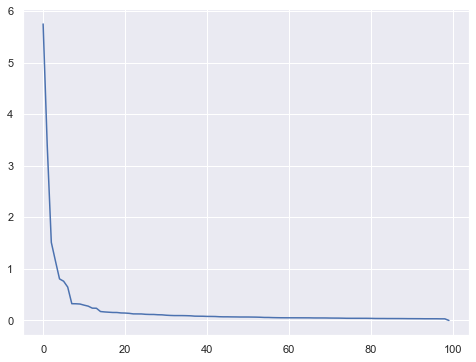

In [48]:
plt.plot(qualities)